# Laptop Recommender System Analysis
This notebook implements and analyzes a clustering-based laptop recommendation system using matplotlib and seaborn for visualizations. We'll explore:
1. Data preparation and preprocessing
2. Feature engineering and normalization
3. Clustering analysis and visualization
4. Recommendation system implementation
5. System evaluation and results

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from typing import Dict, List, Tuple


## 1. Data Loading and Initial Analysis

In [2]:
df = pd.read_csv('data/CleanedLaptopData.csv')
print("Dataset Info:")
print(df.info())

print("\nSample Data:")
display(df.head())

print("\nBasic Statistics:")
display(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         984 non-null    int64  
 1   index                              984 non-null    int64  
 2   link                               984 non-null    object 
 3   name                               984 non-null    object 
 4   user rating                        984 non-null    float64
 5   Price (in Indian Rupees)           984 non-null    int64  
 6   Type                               984 non-null    int64  
 7   Dedicated Graphic Memory Capacity  984 non-null    float64
 8   Processor Brand                    984 non-null    int64  
 9   SSD                                984 non-null    int64  
 10  RAM (in GB)                        984 non-null    int64  
 11  RAM Type                           984 non-n

,Unnamed: 0,index,link,name,user rating,Price (in Indian Rupees),Type,Dedicated Graphic Memory Capacity,Processor Brand,SSD,...,battery_backup,gpu name,gpu_benchmark,ram_type_tokenized,gpu_processor tokenized,Normalized_CPU_Ranking,Normalized_GPU_Benchmark,Portability,Performance_Score,Value_Score
0,0,0,https://www.flipkart.com/asus-rog-strix-scar-1...,asus rog strix scar 17 core i9 12th gen - (32 ...,5.000000,234990,1,8.0,1,1,...,4.0,nvidia geforce rtx 3070 ti,168.00,7,1,1.000000,0.719828,1.000000,81.778879,21.498707
1,1,1,https://www.flipkart.com/asus-rog-strix-scar-1...,asus rog strix scar 15 core i9 12th gen - (32 ...,4.206232,229990,1,8.0,1,1,...,4.0,nvidia geforce rtx 3070 ti,168.00,7,1,1.000000,0.719828,27.344669,81.778879,22.175639
2,2,2,https://www.flipkart.com/hp-victus-ryzen-7-oct...,hp victus ryzen 7 octa core 5800h - (16 gb/512...,4.206232,104091,1,4.0,2,1,...,4.0,nvidia geforce rtx 3050,72.60,4,2,0.933555,0.308621,19.481971,52.742613,35.696936
3,3,3,https://www.flipkart.com/lenovo-ideapad-gaming...,lenovo ideapad gaming 3i ryzen 7 octa core r7-...,4.206232,87717,1,4.0,2,1,...,4.0,nvidia geforce rtx 3050,72.60,4,2,0.977852,0.308621,28.963432,54.058227,45.501649
4,4,4,https://www.flipkart.com/lenovo-yoga-slim-7-co...,lenovo yoga slim 7 core i5 11th gen - (16 gb/5...,4.206232,75990,2,0.0,1,1,...,4.5,intel hd,4.23,4,3,0.884828,0.013922,66.777213,37.592898,34.624273



Basic Statistics:


,Unnamed: 0,index,user rating,Price (in Indian Rupees),Type,Dedicated Graphic Memory Capacity,Processor Brand,SSD,RAM (in GB),Expandable Memory,...,CPU_ranking,battery_backup,gpu_benchmark,ram_type_tokenized,gpu_processor tokenized,Normalized_CPU_Ranking,Normalized_GPU_Benchmark,Portability,Performance_Score,Value_Score
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,9.840000e+02,984.000000,984.000000,984.000000,984.000000
mean,491.500000,491.500000,4.206232,69849.695122,2.154472,1.328016,1.321138,0.891260,10.422764,0.389228,...,230.639228,4.414634,40.685955,4.266260,10.140244,7.490153e-01,0.171060,56.388316,36.418745,40.165738
std,284.200633,284.200633,0.374224,38694.092347,0.963484,2.232855,0.565650,0.311471,4.955974,0.487823,...,209.577002,0.260739,42.637175,0.764311,10.352910,2.320897e-01,0.183781,18.547079,14.325654,13.934245
min,0.000000,0.000000,1.800000,15990.000000,1.000000,0.000000,1.000000,0.000000,4.000000,0.000000,...,4.000000,4.000000,1.000000,1.000000,1.000000,1.110223e-16,0.000000,1.000000,3.993470,1.000000
25%,245.750000,245.750000,4.200000,43475.000000,2.000000,0.000000,1.000000,1.000000,8.000000,0.000000,...,87.000000,4.500000,5.050000,4.000000,5.000000,6.035437e-01,0.017457,48.955157,24.393719,30.960506
50%,491.500000,491.500000,4.206232,59990.000000,2.000000,0.000000,1.000000,1.000000,8.000000,0.000000,...,108.000000,4.500000,17.500000,4.000000,7.000000,8.848283e-01,0.071121,56.386731,36.688669,40.379253
75%,737.250000,737.250000,4.400000,82461.750000,2.000000,4.000000,2.000000,1.000000,16.000000,1.000000,...,362.000000,4.500000,72.600000,4.000000,8.250000,9.080842e-01,0.308621,70.684012,45.849841,48.019582
max,983.000000,983.000000,5.000000,301990.000000,4.000000,16.000000,5.000000,1.000000,32.000000,1.000000,...,907.000000,5.000000,233.000000,8.000000,62.000000,1.000000e+00,1.000000,100.000000,100.000000,100.000000


## 2. Feature Analysis

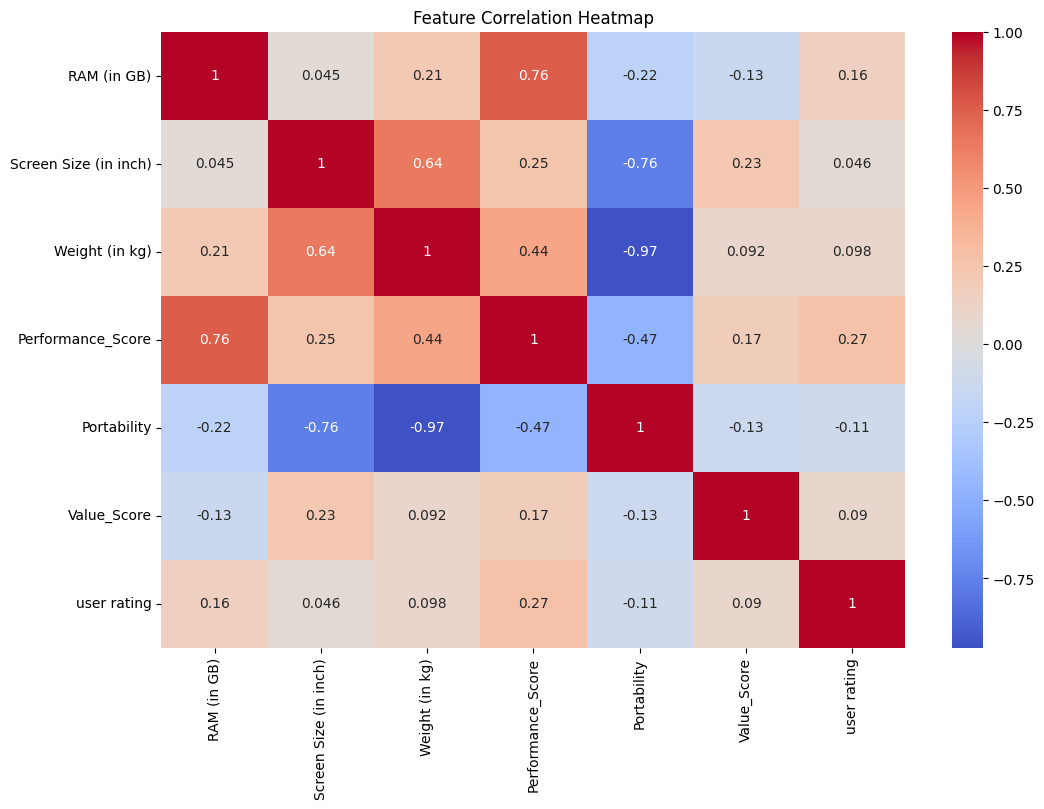

In [3]:
key_features = ['RAM (in GB)', 'Screen Size (in inch)', 'Weight (in kg)',
                'Performance_Score', 'Portability', 'Value_Score', 'user rating']

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[key_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


## 3. Clustering Analysis

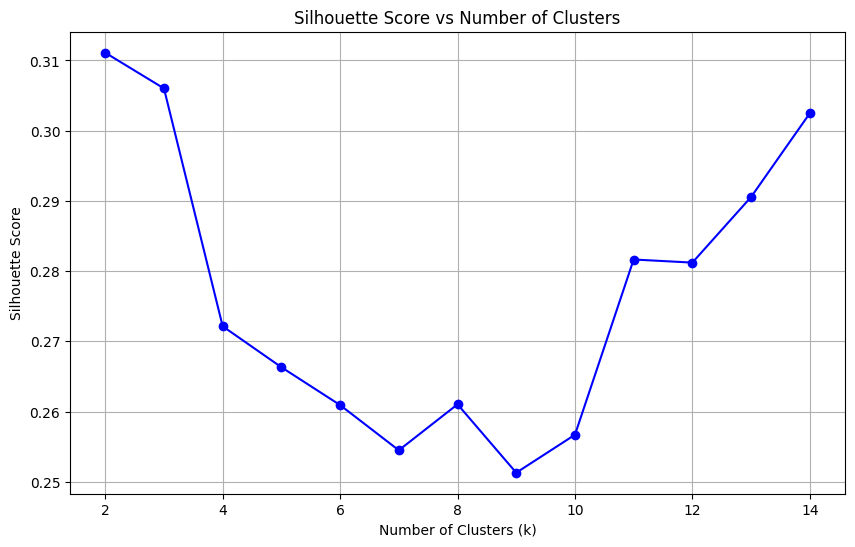

Optimal number of clusters: 2


In [4]:
feature_columns = ['RAM (in GB)', 'Screen Size (in inch)', 'Weight (in kg)',
                  'Normalized_CPU_Ranking', 'Normalized_GPU_Benchmark',
                  'Portability', 'Performance_Score', 'Value_Score', 'user rating']

scaler = MinMaxScaler()
features_normalized = pd.DataFrame(
    scaler.fit_transform(df[feature_columns]),
    columns=feature_columns
)


max_clusters = 15
silhouette_scores = []
K = range(2, max_clusters)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_normalized)
    score = silhouette_score(features_normalized, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

optimal_clusters = K[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_clusters}")


## 4. Cluster Visualization

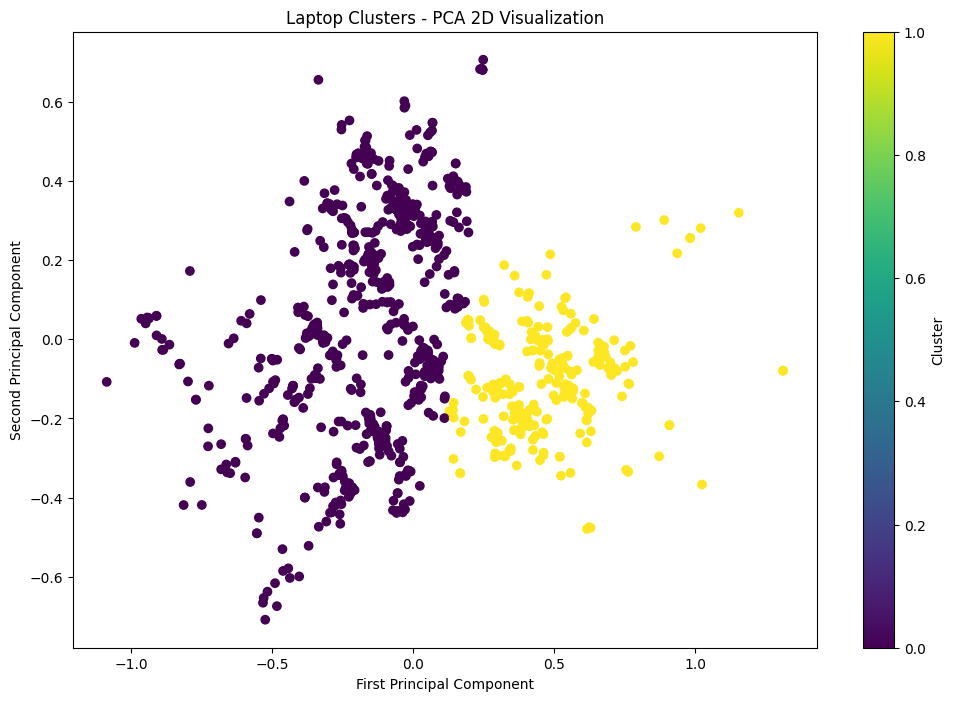

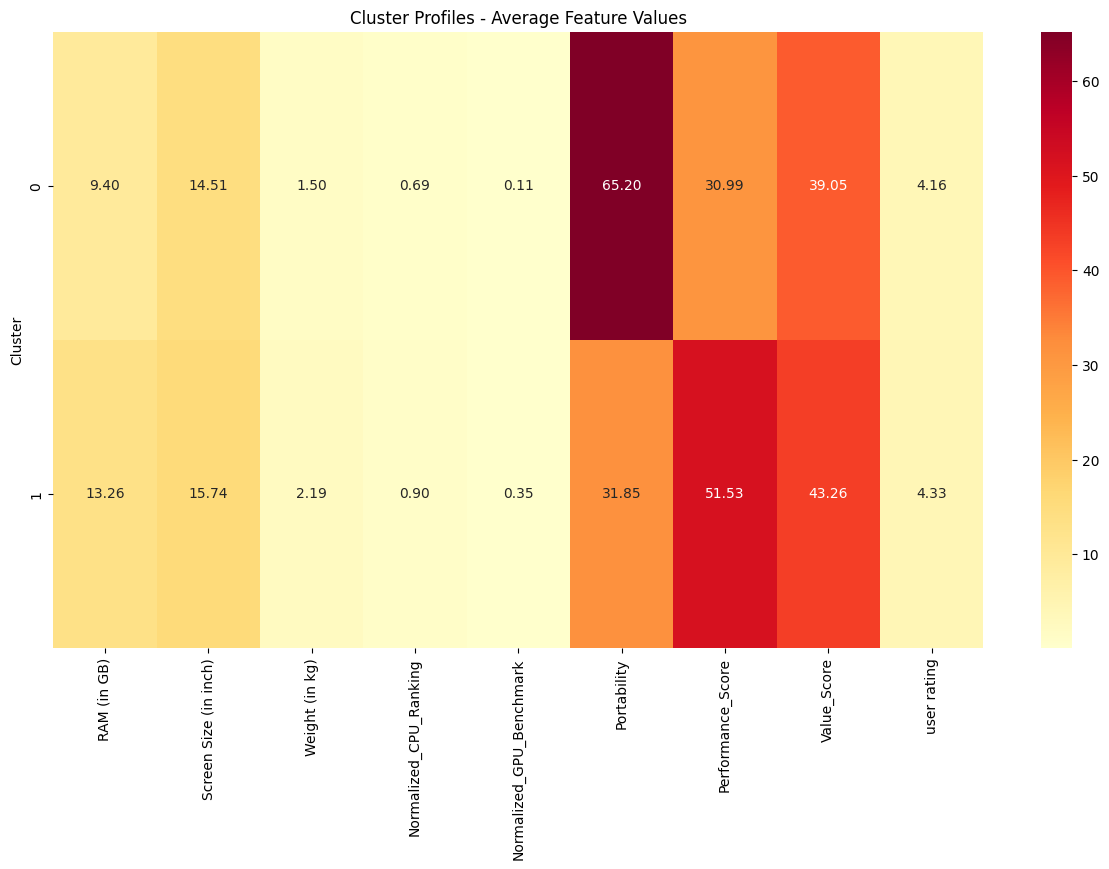

In [5]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_normalized)

pca = PCA(n_components=3)
pca_features = pca.fit_transform(features_normalized)


plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], 
                     c=df['Cluster'], cmap='viridis')
plt.title('Laptop Clusters - PCA 2D Visualization')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='Cluster')
plt.show()


cluster_profiles = df.groupby('Cluster')[feature_columns].mean()


plt.figure(figsize=(15, 8))
sns.heatmap(cluster_profiles, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Cluster Profiles - Average Feature Values')
plt.ylabel('Cluster')
plt.show()